<a href="https://colab.research.google.com/github/vivekbabu9640/DataScienceProjects/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


### Loading and Exploration of Data

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [ ]:
df.head(5)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df['class'].value_counts())

class
0    284315
1       492
Name: count, dtype: int64


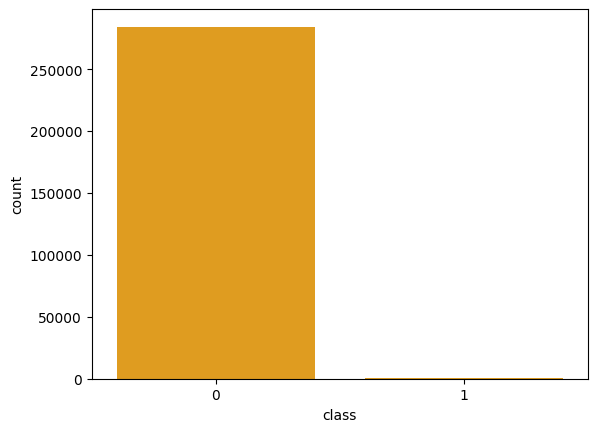

In [ ]:
sns.countplot(x='class',data=df, color = 'orange')
plt.show()

### Data Preprocessing

In [ ]:
X = df.drop('class', axis =1)
y = df['class']

### Scaling Data

In [ ]:
scaler = StandardScaler()
X['time'] = scaler.fit_transform(X['time'].values.reshape(-1,1))
X['amount'] = scaler.fit_transform(X['amount'].values.reshape(-1,1))


### Splitting Data

In [ ]:
# Drop rows with NaN in the target variable 'y' from both X and y
nan_rows = y.isna()
X = X[~nan_rows]
y = y[~nan_rows]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Model Training

In [ ]:
lr_model = LogisticRegression(max_iter =1000, class_weight='balanced')

lr_model.fit(X_train_res,y_train_res)
y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:

rf  = RandomForestClassifier(n_estimators = 100, class_weight  = 'balanced', random_state =42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

start random forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



### Model Evaluation


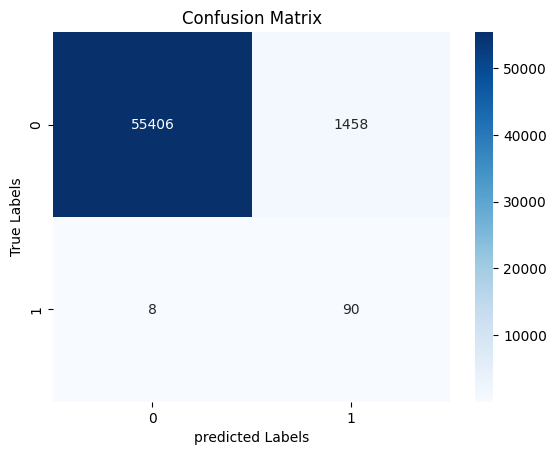

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('predicted Labels')
plt.ylabel('True Labels')
plt.show()

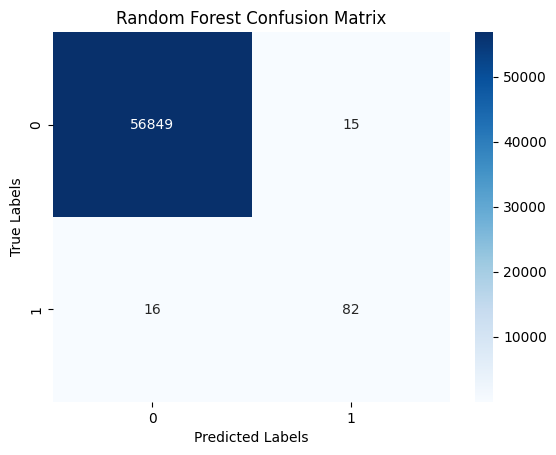

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

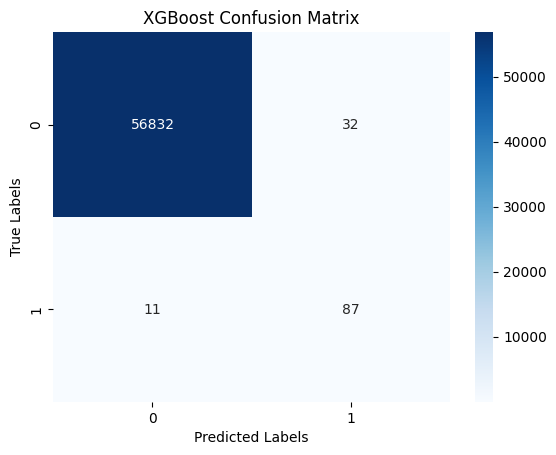

In [81]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ROC-AUC Score: 0.973103297664029


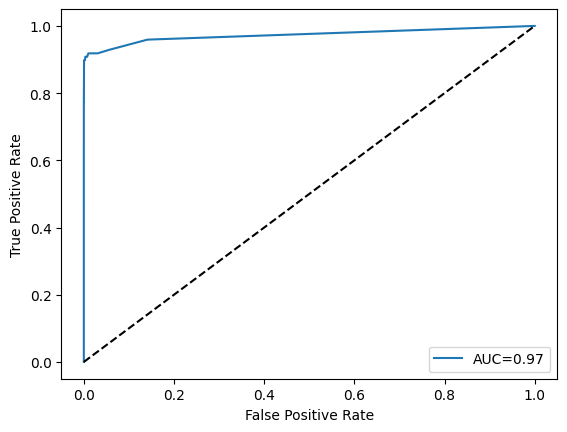

In [82]:
#roc auc

y_proba = rf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_score:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [93]:
import streamlit as st
import joblib


model = joblib.load('rf.pkl')

st.title("Fraud Detection")
st.write("Enter the transaction details to check for fraud.")

amount = st.number_input("Amount of Transaction")
time = st.number_input("Time of transaction in seconds")


features = [time] + [0]*28 + [amount]

if st.button("Predict"):
  result = model.predict([features])[0]
  st.success("🚨 FRAUD!!" if result == 1 else "✅ LEGIT")



2025-08-31 15:37:40.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 15:37:40.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [94]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'rf.pkl')

['rf.pkl']